In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
def download_dados(tickers, interval = '1d', period = 'max'):
    
    df = yf.download(tickers, interval=interval, period=period)['Adj Close']
    #retorno, df_ln = coin.calc_ret_ln(df)

    return df

In [32]:
ativos = pd.read_csv('ativos.csv', sep=';')
ativos = ativos.iloc[:-40]
ativos.drop([425, 506, 561, 681], inplace=True)

In [33]:
tickers = ' '
for i in range(len(ativos)):
    aux = ativos.iloc[i][1]
    tickers = tickers +' '+ aux
tickers

'  MSFT AAPL AMZN TSLA GOOGL GOOG FB NVDA BRK.B JPM JNJ UNH HD BAC PG V ADBE DIS NFLX CRM MA PYPL XOM TMO PFE CSCO CMCSA ACN ABT PEP MRK AVGO COST NKE VZ KO CVX WMT WFC LLY ABBV INTC DHR MCD T TXN INTU LIN NEE LOW MDT ORCL AMD QCOM UNP UPS HON MS PM GS C NOW BLK RTX SBUX BMY AMAT TGT ISRG AMT CVS SCHW AMGN MRNA BA GE IBM CAT AXP SPGI PLD MMM ANTM ZTS BKNG COP DE ADI ADP SYK PNC CHTR MDLZ TFC GILD CB USB MO LRCX TJX MMC LMT GM CSX MU CME CCI EL DUK ICE SHW EQIX CI F EW TMUS NSC BDX COF REGN FIS ADSK ETN APD AON SO ITW CL MCO WM HCA ILMN BSX D FISV KLAC DXCM FDX HUM NXPI EMR ECL FCX PGR SPG NOC IDXX MSCI EOG EXC DG AIG ATVI JCI SNPS PSA ROP TEL INFO CMG TROW VRTX ALGN IQV APTV EBAY A CDNS BK MET XLNX APH GD SLB CARR MAR DLR FTNT KMB LHX SIVB PRU NEM DOW MCHP TWTR CNC PXD ORLY MSI AEP TT MTCH DD ROST CTSH BIIB SRE MPC HLT BAX TRV O EA GPN SYY PAYX ROK PH RMD FRC PPG AZO SBAC CTAS GIS HPQ ALL STZ YUM STT ADM IFF WBA AMP CBRE WELL DFS MCK AFL PSX VRSK OTIS WMB XEL MTD EFX CMI KEYS ANSS AJG 

In [ ]:
#tickers = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA  BRAP4.SA  BRFS3.SA BRKM5.SA BRML3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SULA11.SA SUZB3.SA TAEE11.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA WEGE3.SA YDUQ3.SA"

In [34]:
from mlpairs import OpticsPairs
import pandas as pd

stock_prices = yf.download(tickers, interval='1d', period='3y')['Adj Close']
#stock_prices = pd.read_csv('stock_prices.csv', index_col='Date')
train = stock_prices[:'2019']
test = stock_prices['2020':]

train.head()

[*********************100%***********************]  729 of 729 completed

3 Failed downloads:
- EWW: Error occurred while retrieving timeseries from Redis, keys: [RedisKey [key=EWW, cluster=finance]]
- BF.B: None
- BRK.B: No data found, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XSOE,XYL,YANG,YINN,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-05,64.403152,35.151604,161.405304,48.898945,69.645958,84.006088,392.910004,67.129265,152.267532,239.889999,...,25.382261,66.281212,60.282505,19.733435,83.001892,112.503639,168.000000,44.776367,NaN,90.981613
2018-11-06,64.471550,34.610352,164.318420,49.427746,70.556808,79.680580,389.850006,67.672874,153.054794,240.559998,...,25.294147,67.577637,60.223576,19.781994,83.409920,112.513428,178.740005,45.264061,NaN,91.020889
2018-11-07,66.699425,36.381710,166.684113,50.926807,73.339943,82.089966,412.100006,69.141525,157.327087,253.429993,...,25.722260,69.173935,56.638844,20.927931,84.814323,115.564919,180.240005,45.742569,NaN,93.405319
2018-11-08,66.240181,36.273464,168.580582,50.749123,73.989349,84.584732,413.850006,69.580223,157.931946,249.960007,...,25.179220,69.231979,60.282505,19.568344,85.839149,116.601616,182.479996,46.395897,NaN,93.120750
2018-11-09,65.732056,35.643646,167.339096,49.770596,74.883324,84.290649,405.170013,69.418091,158.555984,244.839996,...,24.662033,68.574120,65.271675,18.033957,86.085869,115.036766,181.500000,46.156654,NaN,93.483803


In [35]:
stock_prices.to_csv('stock_prices.csv')

In [38]:
train.fillna(0, inplace=True)
test.fillna(0,inplace=True)
print(len(train), len(test))

291 466


In [40]:
op = OpticsPairs(train)
op.returns.head()
op.returns.dropna(inplace=True, axis=1)

In [43]:
op.returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XRT,XSOE,XYL,YANG,YINN,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-06,0.001062,-0.015398,0.018048,0.010814,0.013078,-0.051490,-0.007788,0.008098,0.005170,0.002793,...,0.001443,-0.003471,0.019559,-0.000978,0.002461,0.004916,0.000087,0.063929,0.010892,0.000432
2018-11-07,0.034556,0.051180,0.014397,0.030328,0.039445,0.030238,0.057073,0.021702,0.027913,0.053500,...,0.009467,0.016925,0.023622,-0.059524,0.057928,0.016837,0.027121,0.008392,0.010571,0.026197
2018-11-08,-0.006885,-0.002975,0.011378,-0.003489,0.008855,0.030391,0.004247,0.006345,0.003845,-0.013692,...,0.011621,-0.021112,0.000839,0.064331,-0.064965,0.012083,0.008971,0.012428,0.014283,-0.003047
2018-11-09,-0.007671,-0.017363,-0.007364,-0.019282,0.012082,-0.003477,-0.020974,-0.002330,0.003951,-0.020483,...,-0.019548,-0.020540,-0.009502,0.082763,-0.078412,0.002874,-0.013420,-0.005370,-0.005157,0.003899
2018-11-12,-0.041177,0.017670,-0.024068,-0.050374,0.010136,0.011929,-0.166128,-0.030636,-0.016409,-0.033369,...,-0.009250,-0.014874,-0.026665,0.029341,-0.032849,-0.013999,-0.027036,-0.022424,-0.014354,-0.008817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000469,-0.004096,0.003751,0.000951,-0.004432,-0.002103,0.010913,-0.000801,0.003700,0.002098,...,0.003732,-0.000933,-0.003926,-0.002463,0.002814,0.005210,-0.002446,-0.009348,0.003701,0.004155
2019-12-26,0.001758,0.016792,-0.008096,0.019840,-0.000222,-0.004331,-0.007487,0.000000,0.002079,0.004732,...,0.007218,0.004800,-0.000509,-0.028882,0.028999,0.014552,-0.002191,0.000354,0.002523,0.000827
2019-12-27,-0.000351,-0.041456,-0.005776,-0.000380,-0.007013,-0.001646,-0.010175,0.001375,0.000802,-0.001238,...,0.004126,0.002886,0.003053,-0.011439,0.010909,0.001081,-0.001929,0.006210,-0.003097,0.001654


In [44]:
for i in range(len(op.returns)):
    for j in range(len(op.returns.columns)):
        if op.returns.iloc[i][j] == np.inf or op.returns.iloc[i][j] == -np.inf:
            op.returns.iloc[i][j] = 0.00

In [45]:
op.returns.fillna(0,inplace=True)

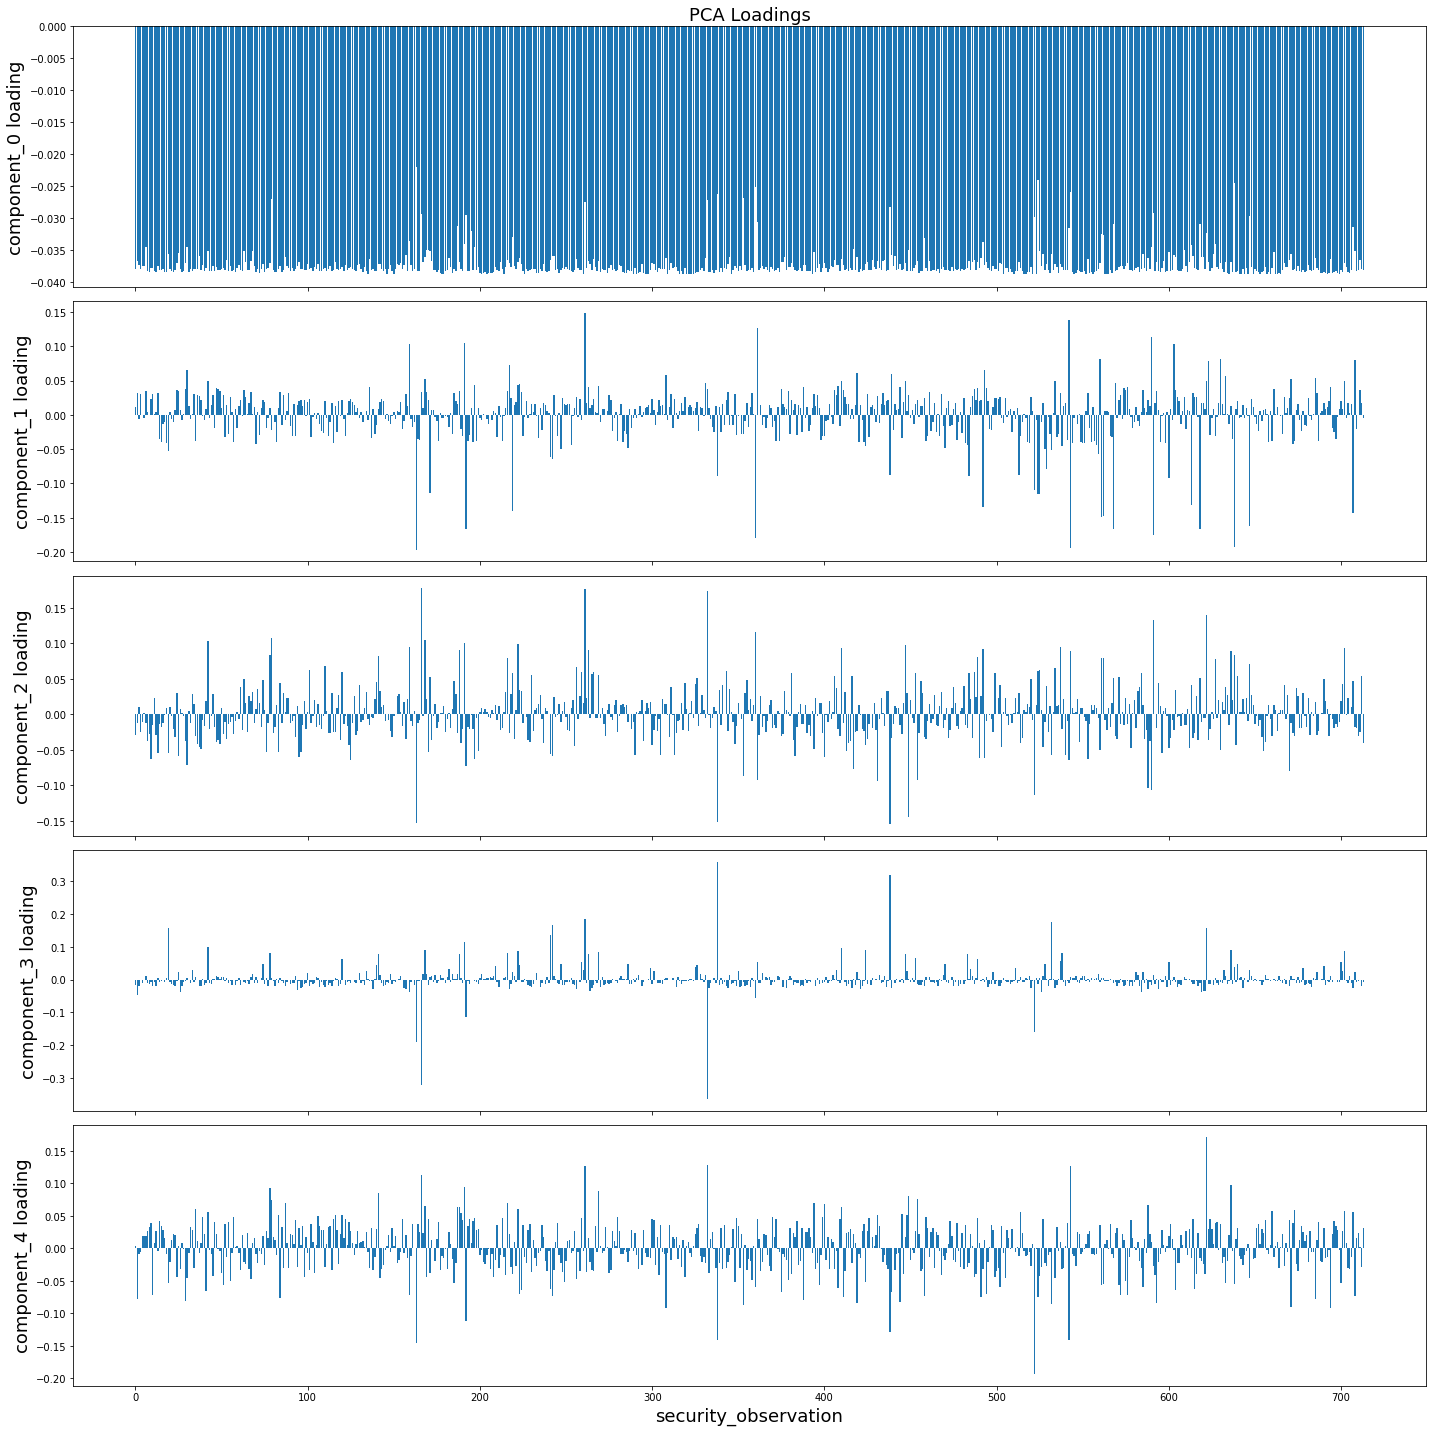

In [46]:
op.reduce_PCA()
op.plot_loadings()

In [48]:
op.find_pairs()
op.pairs

ValueError: All arrays must be of the same length

In [49]:
op.plot_clusters(n_dimensions=2)

ValueError: Required: 
 1. n_components 
 2.                                 reduced_returns

In [50]:
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

ValueError: pairs not found: must run .find_pairs()                              before this function

In [51]:
op.filter_pairs()
op.filtered_pairs

ValueError: Required: 
 1. prices 
 2.                                 engle_granger_tests 
 3. hurst_exponents                                 
 4. half_lives 
 5. avg_cross_count

In [ ]:
for i in op.filtered_pairs.index:
    op.plot_pair_price_spread(idx=i)